#                                                               Reviews Analysis using NLP

#Features in Dataset


1.   Rating of Alexa 
2.   Date on which reviews are given
3.   Variation of Alexa
4.   Verified_reviews
5.   Feedback 



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# Import Dataset
Data = pd.read_csv("amazon_alexa.tsv",delimiter="\t",quoting=3)
Data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# Print shape of Dataset
Data.shape

(3150, 5)

In [4]:
# Print summary of Dataset
Data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# Checking if there is any NAN value in Dataset
Data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
# Adding a length column to get the length of reviews
Data["length"] = Data["verified_reviews"].apply(len)
Data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [7]:
# Describing the data according to length
a = Data.groupby("length").describe()
a.sample(5)

rating                                ...  feedback                         
        count mean       std  min  25%  50%  ...       std  min  25%  50%  75%  max
length                                       ...                                   
162       2.0  3.0  0.000000  3.0  3.0  3.0  ...  0.000000  1.0  1.0  1.0  1.0  1.0
380       1.0  5.0       NaN  5.0  5.0  5.0  ...       NaN  1.0  1.0  1.0  1.0  1.0
476       1.0  3.0       NaN  3.0  3.0  3.0  ...       NaN  1.0  1.0  1.0  1.0  1.0
791       1.0  4.0       NaN  4.0  4.0  4.0  ...       NaN  1.0  1.0  1.0  1.0  1.0
51       15.0  4.2  1.320173  1.0  3.5  5.0  ...  0.351866  0.0  1.0  1.0  1.0  1.0

[5 rows x 16 columns]

In [8]:
# Grouping data according to rating
b = Data.groupby("rating").describe()
b

feedback                      ... length                              
          count mean  std  min  25%  ...    min    25%    50%     75%     max
rating                               ...                                     
1         161.0  0.0  0.0  0.0  0.0  ...    1.0  36.00  120.0  284.00  1126.0
2          96.0  0.0  0.0  0.0  0.0  ...    1.0  78.75  165.0  311.25  1688.0
3         152.0  1.0  0.0  1.0  1.0  ...    1.0  54.00  131.0  286.00  1956.0
4         455.0  1.0  0.0  1.0  1.0  ...    1.0  34.50  100.0  242.00  1362.0
5        2286.0  1.0  0.0  1.0  1.0  ...    1.0  27.00   65.0  136.00  2853.0

[5 rows x 16 columns]

In [9]:
# Grouping data according to feedback
c = Data.groupby("feedback").describe()
c

rating                                ... length                            
           count      mean       std  min  25%  ...    min   25%    50%    75%     max
feedback                                        ...                                   
0          257.0  1.373541  0.484688  1.0  1.0  ...    1.0  53.0  137.0  291.0  1688.0
1         2893.0  4.737643  0.546544  3.0  5.0  ...    1.0  29.0   70.0  155.0  2853.0

[2 rows x 16 columns]

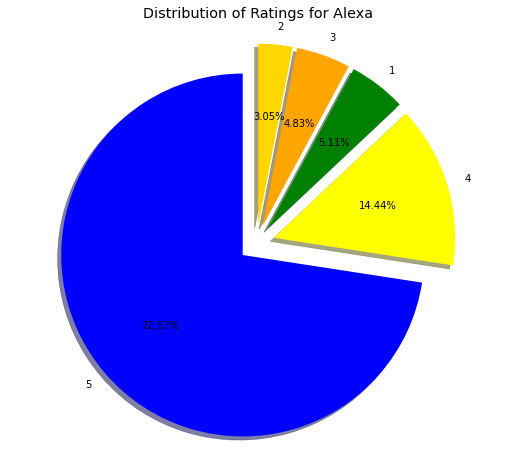

In [10]:
# Plotting pie chart
plt.figure(figsize=(8,8))
ratings = Data["rating"].value_counts()
label = ratings.index
size_rating = ratings.values
colors = ['blue', 'yellow', 'green', 'orange','gold']
plt.pie(size_rating,labels=label, colors=colors, startangle=90,explode=(0.1, 0.1, 0.1, 0.1,0.1),shadow=True, autopct='%1.2f%%')
plt.axis("equal")
plt.title('Distribution of Ratings for Alexa')
plt.show()

By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.57% people have given Alexa 5 Star rating, which is very good. 14.44% people have given Alexa a 4 Star Rating, which is also good. that means 72.57+14.44 = 87% people have given alexa good rating.

Text(0.5, 1.0, 'Distribution of variation for Alexa')

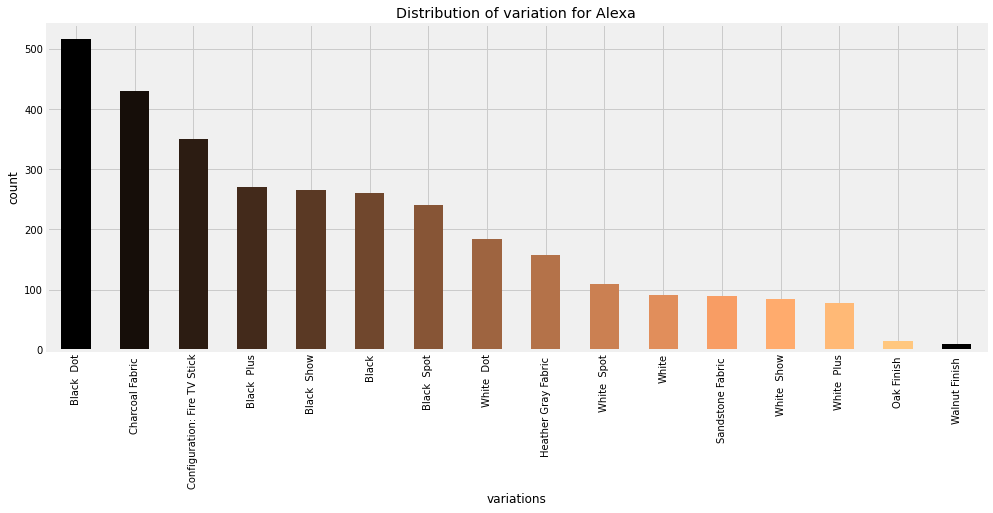

In [11]:
# Plotting distribution graph
plt.figure(figsize=(15,6))
color = plt.cm.copper(np.linspace(0, 1, 15))
Data["variation"].value_counts().plot.bar(color=color)
plt.xlabel('variations')
plt.ylabel('count')
plt.title("Distribution of variation for Alexa")

The looking at the above Bar plot, which plots the different Variatios of Amazon Alexa with their popularity or no. of counts. It is quite clear that Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples, which is really good.

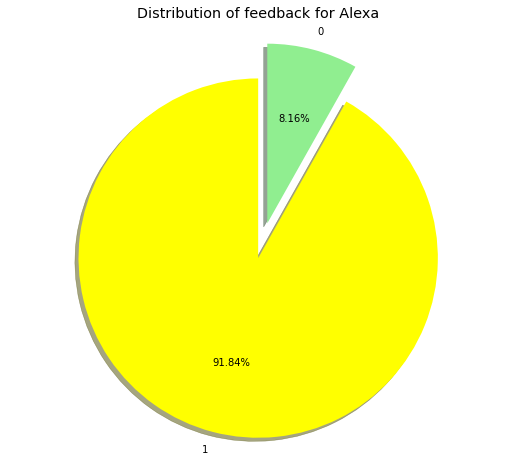

In [12]:
# Plotting pie chart
plt.figure(figsize=(8,8))
feedback = Data["feedback"].value_counts()
label = feedback.index
size_feedbacks = feedback.values
colors = ['yellow', 'lightgreen']
plt.pie(size_feedbacks,labels=label, colors=colors, startangle=90,explode=(0.1, 0.1),shadow=True, autopct='%1.2f%%')
plt.axis("equal")
plt.title('Distribution of feedback for Alexa')
plt.show()

From above pie chart we are going to analyze the Pie Chart representing the Distribution of feedback for Amazon Alexa which says that around 91.84% people gave a positive feedback to Amazon Alexa and only 8.16% people gave negative feedback to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people and only few people did not like it for some unforeseeable factors.

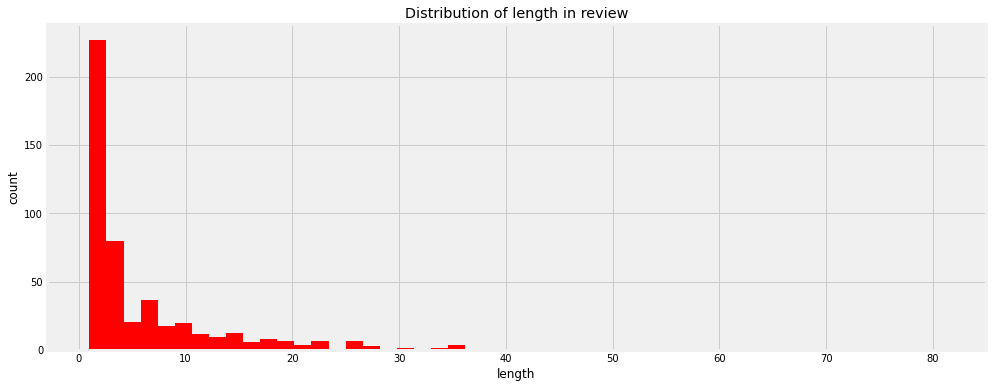

In [13]:
# Plotting the disribution graph
plt.figure(figsize=(15,6))
Data["length"].value_counts().plot(kind="hist",color="red",bins=50)
plt.xlabel('length')
plt.ylabel('count')
plt.title("Distribution of length in review")
plt.show()

From above Distribution Plot, which shows a distribution of Length of the Reviews written by the people. This is to show on an average what is the length of the reviews written by the people for amazon alexa. Most of the Reviews are so short that is only One or Two words longer. We can see that most people write reviwes that is 5-20 words longer.

In [14]:
# checking smallest length of  review
Data[Data["length"]==1]["verified_reviews"].iloc[0]

'😍'

In [15]:
Data[Data["length"]==25]["verified_reviews"].iloc[0]

'Sounds great!! Love them!'

In [16]:
Data[Data["length"]==255]["verified_reviews"].iloc[0]

'"For a refurbished item.. It works like its new... Which I love... Easy set up,  which I love. The only issue is the volume,  if you are listening while relaxing its fine,  but if you are expecting to do anything else,  I recommend  purchasing a speaker."'

In [17]:
Data[Data["length"]==466]["verified_reviews"].iloc[0]

'"Do not understand all the excitement over these alexa devices or the google ones either.  It rarely gets what I say correct, does not control the Dish receiver.  Yes I set it up correctly, using the alexa app on my phone.  We got this for 129,  which is a good deal, ti is definately not worth the 229 price though.  Maybe in another month it will get better, or either I have one that is just deaf and dumb.  Really can not recommend this item at the current time"'

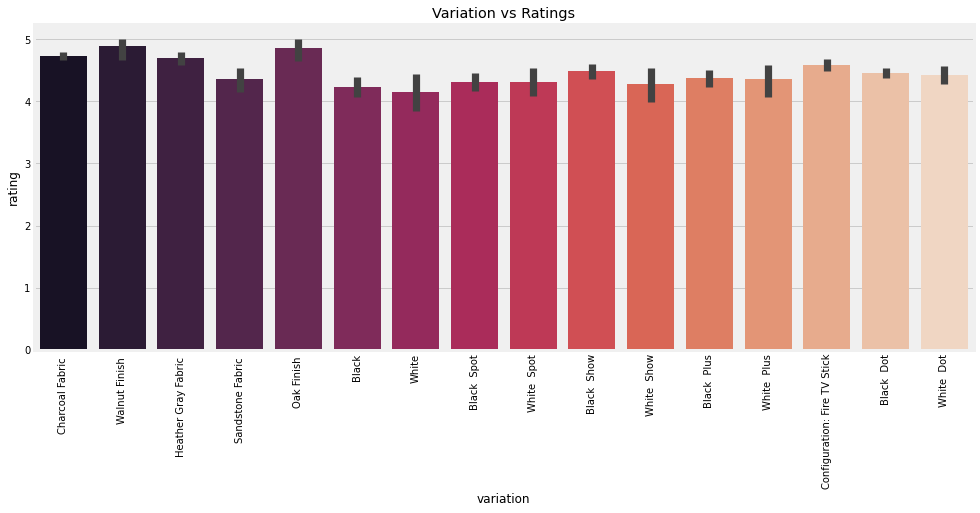

In [18]:
# Plotting bar graph
plt.figure(figsize=(15,6))
sns.barplot(x=Data["variation"],y=Data["rating"],palette="rocket")
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

The above Bar plot, which plots Variation and ratings to check which of the Variation of Amazon Alexa has been perfoeming best in terms of ratings.

Walnut finish and Oak Finish have very high ratings, the ratings rangee from 4.5 to 5 which is really impressive, These variation are rare and have high reviews.

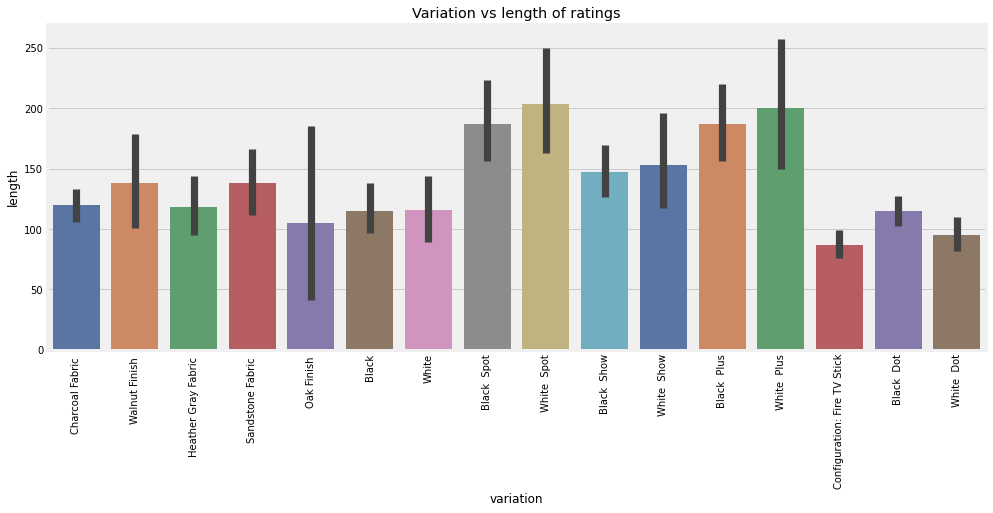

In [19]:
# Plotting the bar graph
plt.figure(figsize=(15,6))
sns.barplot(x=Data["variation"],y=Data["length"],palette="deep")
plt.title("Variation vs length of ratings")
plt.xticks(rotation = 90)
plt.show()

The above Bar plot shows swarmplot between Variation in Amazon Alexa and Length of the Reviews. We would like to see for which of the model variations of Amaozn Alexa people have written the longest reviews. By looking at the graph, we can easily spot that the longest review was written for Black Plus. then Black Spot has two long reviews and Black, and Black plus variation also has a very long review. we might conclude that the longest reviews are all written for the Black-type variations in Amazon Alexa.

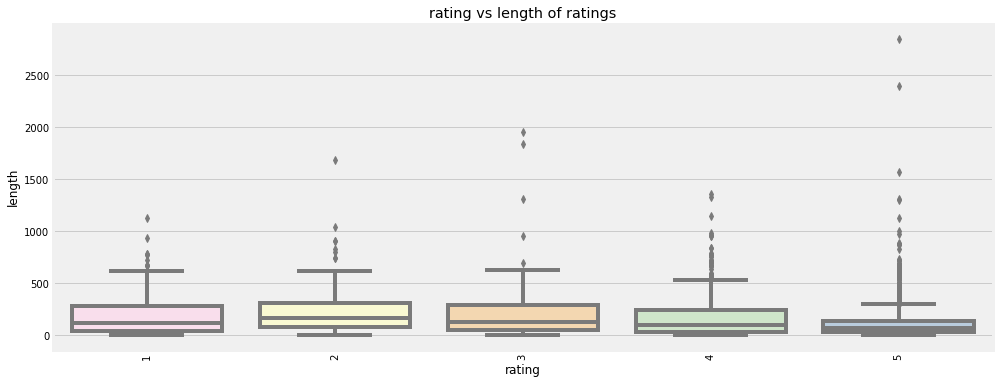

In [20]:
# Plotting box plot
plt.figure(figsize=(15,6))
sns.boxplot(x=Data["rating"],y=Data["length"],palette='Pastel1_r')
plt.title("rating vs length of ratings")
plt.xticks(rotation = 90)
plt.show()

The above Boxplot shows a plot between Rating and Length, We would like to that how much a user is gonna write if he/she is going to give a low rating or a high rating to the product.

We can see that most of the people who gave 5 star rating to Alexa wrote a very small review in comparison to the people who did not give alexa a 5 star rating. But, the longest reviews are written for the 5 star ratings only. The people who gave alexa, a low rating such as 1 or 2 star rating did not consider writing a longer review maybe because they do not like the product.

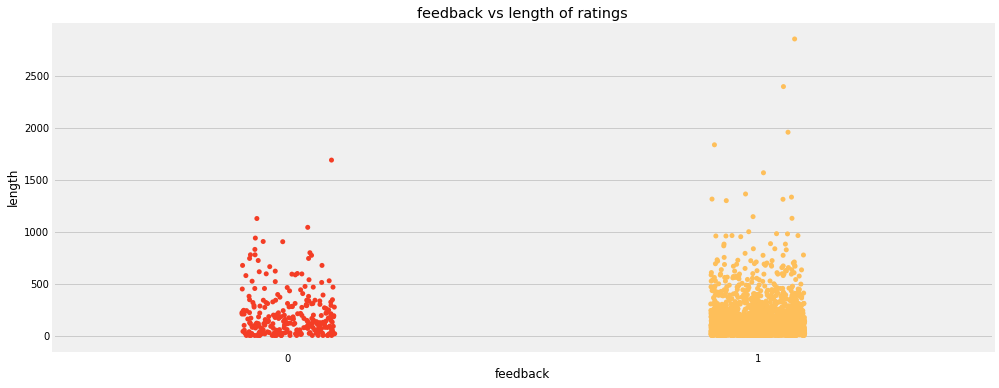

In [21]:
# Potting stripplot
plt.figure(figsize=(15,6))
sns.stripplot(x=Data["feedback"],y=Data["length"],palette='YlOrRd_r')
plt.title("feedback vs length of ratings")
plt.show()

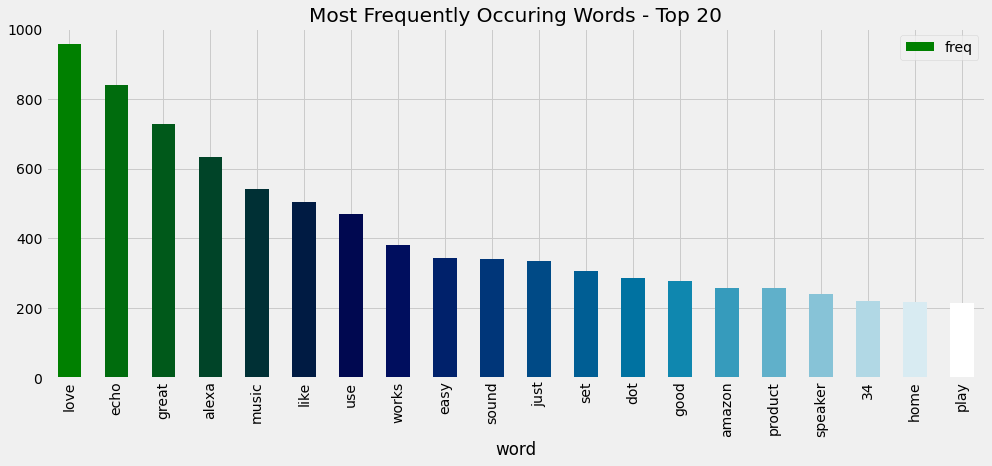

In [22]:
# Plotting top 20 frequently occuring word
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(Data.verified_reviews)
sum_words= words.sum(axis=0)
words_freq = [(words, sum_words[0, idx]) for words, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

The Above Bar plot represents the most frequnt words in the reviews so that we can get a rough idea about the reviews and what people think of the product.

We can see that love is the most frequent word in the word suggesting that most of the people absolutely love alexa. Other frequent words that suggest alexa is doing well are amazing, like, great, works etc.

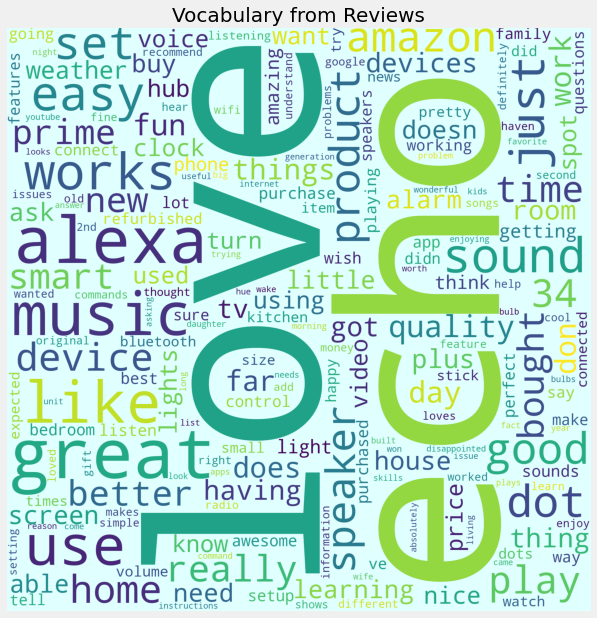

In [23]:
# Plotting wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()


In [24]:
# SPACY
import spacy
nlp = spacy.load('en')
nlp

In [25]:
# SPACY
import warnings
warnings.filterwarnings('ignore')
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
        
for i in range(15, 50):
    one_sentence = Data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

In [26]:
# Importing necessary libraries for natural language processing 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
# Cleaning Text 
corpus = []
for i in range(0,3150):
  review = re.sub('[^a-zA-Z]',' ',Data["verified_reviews"][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
  review = ' '.join(review)
  corpus.append(review)

In [28]:
# Importing TfidfVectorizer for creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(max_features = 2500)

In [29]:
# Dividing dataset in label and features
x = cv.fit_transform(corpus).toarray()
y = Data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [30]:
# Splitting Dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [31]:
# Applying MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [33]:
# Building RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
# Creating object of Model
model = RandomForestClassifier()
model.fit(x_train, y_train)
# Predicting
y_pred = model.predict(x_test)
# Printing Accuracy of training and testing data
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
# Building Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9407407407407408
[[ 26  49]
 [  7 863]]
0.9407407407407408


In [34]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9356129164952695
Standard Variance : 0.010215881005194907


### Accuracy of Model is 94 percent